# t-SNE visualization of CIFAR-100 models

In [1]:
!export PYTHONPATH="/home/fabien/Documents/project/2d/mdistiller:$PYTHONPATH"

In [2]:

import sys
sys.path.append("/home/fabien/Documents/project/2d/mdistiller")
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

from mdistiller.models import cifar_model_dict
from mdistiller.dataset import get_dataset
from mdistiller.engine.utils import load_checkpoint
from mdistiller.engine.cfg import CFG as cfg

In [3]:
# visualize t-SNE
def get_tsne(stu, mpath, svae_path):
    cfg.defrost()
    cfg.DISTILLER.STUDENT = stu
    cfg.DATASET.TYPE = 'cifar100'
    cfg.freeze()
    train_loader, val_loader, num_data, num_classes = get_dataset(cfg)
    model = cifar_model_dict[cfg.DISTILLER.STUDENT][0](num_classes=num_classes)
    model.load_state_dict(load_checkpoint(mpath)["model"])
    all_features, all_labels = [], []
    model.eval()
    with torch.no_grad():
        for i, (data, labels) in tqdm(enumerate(val_loader)):
            outputs, features = model(data)
            all_features.append(features['pooled_feat'].data.cpu().numpy())
            all_labels.append(labels.data.cpu().numpy())
    all_features = np.concatenate(all_features, 0)
    all_labels = np.concatenate(all_labels, 0)

    tsne = TSNE()
    all_features = tsne.fit_transform(all_features)
    plot_features(all_features, all_labels, num_classes, svae_path)

def plot_features(features, labels, num_classes, svae_path):
    colors = ['C' + str(i) for i in range(num_classes)]
    plt.figure(figsize=(6, 6))
    for l in range(num_classes):
        plt.scatter(
            features[labels == l, 0],
            features[labels == l, 1],
            c=colors[l], s=1, alpha=0.4)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(svae_path, format='pdf')
    plt.show()

Files already downloaded and verified
Files already downloaded and verified


157it [00:08, 18.07it/s]


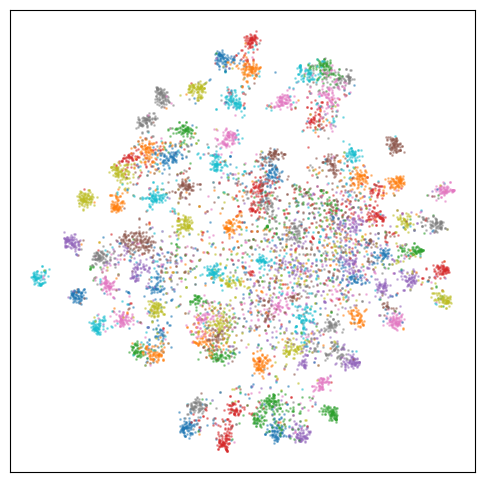

In [5]:
# KD baseline
mpath = "/home/fabien/Documents/project/2d/mdistiller/tools/output/final/324_84/kd_324_84/student_best"
svae_path = "/home/fabien/Documents/project/2d/mdistiller/tools/visualizations/mvkd/kd_res324_84.pdf"
get_tsne("resnet8x4", mpath, svae_path)

Files already downloaded and verified
Files already downloaded and verified


157it [00:08, 17.50it/s]


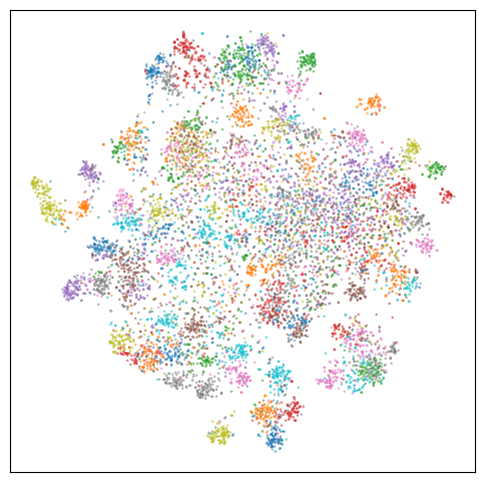

In [6]:
# FitNet
mpath = "/home/fabien/Documents/project/2d/mdistiller/tools/output/final/324_84/fitnet_324_84/student_best"
svae_path = "/home/fabien/Documents/project/2d/mdistiller/tools/visualizations/mvkd/fitnet_tsne_res324_84.pdf"
get_tsne("resnet8x4", mpath, svae_path)

Files already downloaded and verified
Files already downloaded and verified


157it [00:08, 17.76it/s]


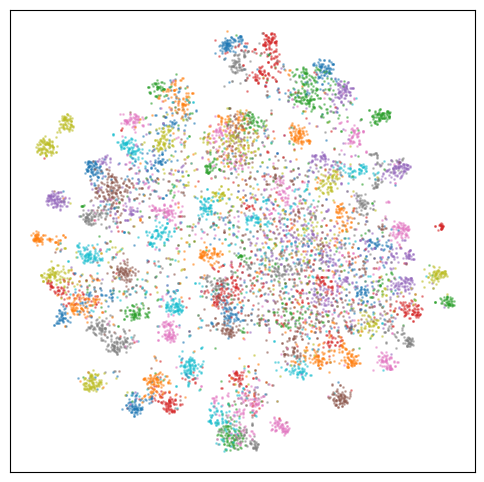

In [7]:
# ReviewKD
mpath = "/home/fabien/Documents/project/2d/mdistiller/tools/output/final/324_84/kr_324_84/student_best"
svae_path = "/home/fabien/Documents/project/2d/mdistiller/tools/visualizations/mvkd/reviewkd_tsne_res324_84.pdf"
get_tsne("resnet8x4", mpath, svae_path)

Files already downloaded and verified


Files already downloaded and verified


157it [00:09, 17.24it/s]


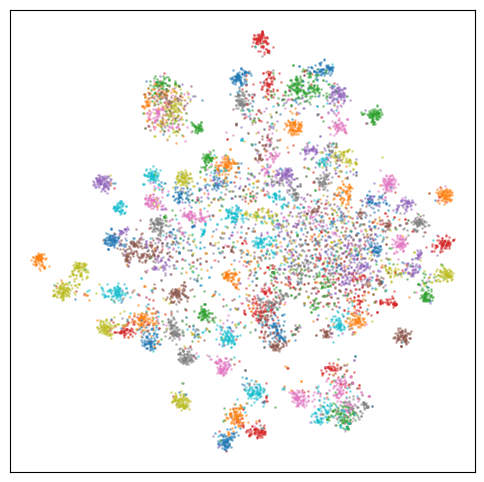

In [11]:
mpath = "/home/fabien/Documents/project/2d/mdistiller/tools/output/final/DFKD/324_84/own/fitnetDFKD_73.07/student_best"
svae_path = "/home/fabien/Documents/project/2d/mdistiller/tools/visualizations/mvkd/ours_tsne_res324_84.pdf"
get_tsne("resnet8x4", mpath, svae_path)

Files already downloaded and verified
Files already downloaded and verified


157it [00:09, 17.32it/s]


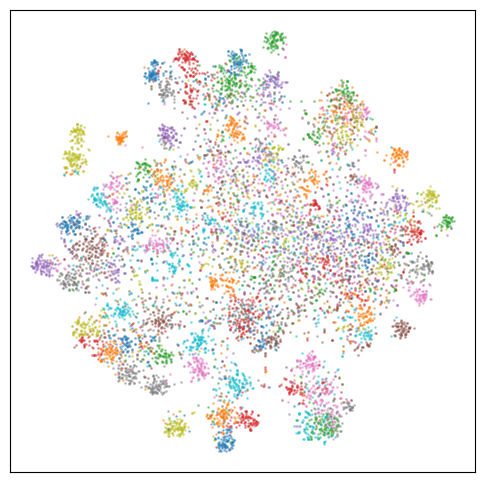

In [33]:
mpath = "/home/fabien/Documents/project/2d/mdistiller/tools/output/visualization_models/mlkd_1_resnet8x4_best.pth"
svae_path = "/home/fabien/Documents/project/2d/mdistiller/tools/visualizations/mvkd/ours_tsne_res324_84_2.pdf"
get_tsne("resnet8x4", mpath, svae_path)


In [30]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet34
from torch.utils.data import DataLoader

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


cfg.defrost()
# cfg.DISTILLER.STUDENT = stu
cfg.DATASET.TYPE = 'cifar100'
cfg.freeze()
train_loader, val_loader, num_data, num_classes = get_dataset(cfg)
# Modify ResNet34 to extract features before the final fully connected layer
model = resnet34(pretrained=True)
# model.fc = torch.nn.Identity()  # Replace the final fully connected layer with an identity function
model = model.cuda()
all_features, all_labels = [], []
model.eval()
with torch.no_grad():
    for i, (data, labels) in tqdm(enumerate(val_loader)):
        features = model(data.cuda())
        all_features.append(features.data.cpu().numpy())
        all_labels.append(labels.data.cpu().numpy())

all_features = np.concatenate(all_features, 0)
all_labels = np.concatenate(all_labels, 0)


# # Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Load CIFAR-100 data
# batch_size = 32
# train_loader, val_loader = load_cifar100(batch_size)

# # Modify ResNet34 to extract features before the final fully connected layer
# model = resnet34(pretrained=True)
# model.fc = torch.nn.Identity()  # Replace the final fully connected layer with an identity function
# model = model.to(device)

# # Extract features from the validation set
# val_features, val_labels = extract_features(model, val_loader)

Files already downloaded and verified
Files already downloaded and verified


/home/fabien/anaconda3/envs/mdis2/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/fabien/anaconda3/envs/mdis2/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
157it [00:00, 207.00it/s]


In [29]:
len(all_features)

10000

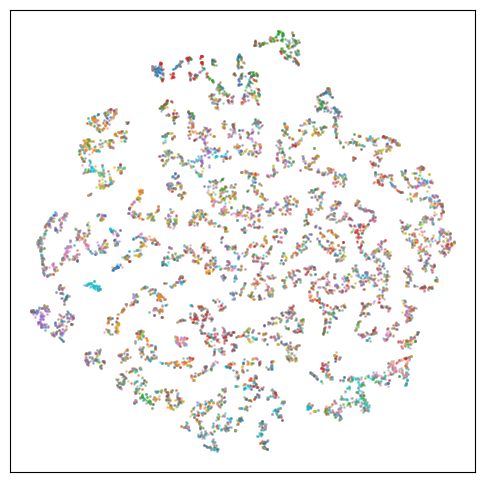

In [32]:
tsne = TSNE()
all_features = tsne.fit_transform(all_features)
plot_features(all_features, all_labels, num_classes, "/home/fabien/Documents/project/2d/mdistiller/tools/visualizations/mvkd/our.pdf")